# analysis of HiC data with midr

Load the library and the package to handle hic .cool data

In [1]:
import cooler
import cooltools
import matplotlib.pyplot as plt

Load all the .cool file with cooler

In [2]:
data_dir = '../data/hic'
files = [
f'{data_dir}/GSM5425510_AP45_1kb.cool', # WT R1
f'{data_dir}/GSM5425511_AP47_1kb.cool', # WT R2
f'{data_dir}/GSM5425517_AP78_1kb.cool', # WT (+mock treatments)
f'{data_dir}/GSM5425518_AP79_1kb.cool', # WT (+mock treatments)
f'{data_dir}/GSM5425519_AP80_1kb.cool', # scc1-depleted (IAA treatment)
f'{data_dir}/GSM5425520_AP81_1kb.cool', # scc1-depleted (IAA treatment)
]
file_ids = ["WT R1", "WT R2", "WT mock R1", "WT mock R2", "Dep R1", "Dep R2"] 
cool_files_1k = [cooler.Cooler(file) for file in files]

we have a full cerevisiae genome

In [3]:
chromstarts = []
for i in cool_files_1k[0].chromnames:
    print(f'{i} : {cool_files_1k[0].extent(i)}')
    chromstarts.append(cool_files_1k[0].extent(i)[0])

chr1 : (np.int64(0), np.int64(252))
chr2 : (np.int64(252), np.int64(1092))
chr3 : (np.int64(1092), np.int64(1433))
chr4 : (np.int64(1433), np.int64(3008))
chr5 : (np.int64(3008), np.int64(3580))
chr6 : (np.int64(3580), np.int64(3858))
chr7 : (np.int64(3858), np.int64(4950))
chr8 : (np.int64(4950), np.int64(5514))
chr9 : (np.int64(5514), np.int64(5945))
chr10 : (np.int64(5945), np.int64(6708))
chr11 : (np.int64(6708), np.int64(7391))
chr12 : (np.int64(7391), np.int64(8476))
chr13 : (np.int64(8476), np.int64(9406))
chr14 : (np.int64(9406), np.int64(10199))
chr15 : (np.int64(10199), np.int64(11308))
chr16 : (np.int64(11308), np.int64(12295))


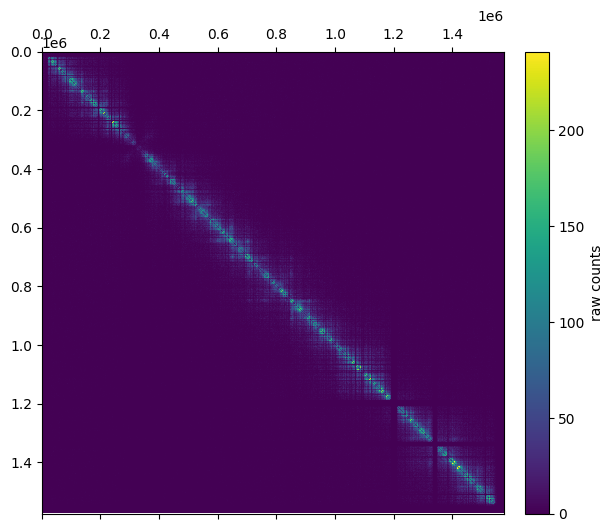

In [4]:
f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow((cool_files_1k[0].matrix(balance=False).fetch('chr5')), extent=(0,cool_files_1k[0].chromsizes['chr4'], cool_files_1k[0].chromsizes['chr4'], 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts')
ax.xaxis.set_label_position('top')

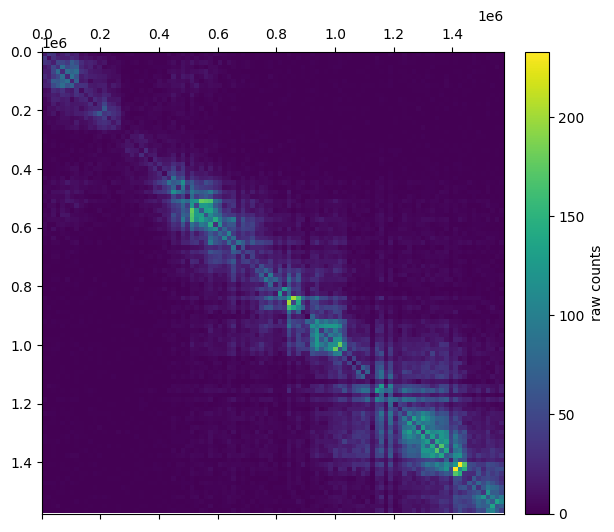

In [5]:
f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow((cool_files_1k[0].matrix(balance=False).fetch('chr5:100000-200000')), extent=(0,cool_files_1k[0].chromsizes['chr4'], cool_files_1k[0].chromsizes['chr4'], 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts')
ax.xaxis.set_label_position('top')

f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow((cool_files_1k[1].matrix(balance=False).fetch('chr5:100000-200000')), extent=(0,cool_files_1k[1].chromsizes['chr4'], cool_files_1k[1].chromsizes['chr4'], 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts')
ax.xaxis.set_label_position('top')

We can generate .cool file at other resolution (5kb, 1kb, 25kb and 100kb) to see the effect of the zeros

In [6]:
import re

re_file = r"(.*)_1kb\.cool"

def get_prefix(regexp, file):
    match = re.search(regexp, file)
    return match.group(1)


In [7]:
# Create multiple resolutions for analysis
resolutions = {
    '5kb': 5,     # 1kb * 5 = 5kb
    '10kb': 10,   # 1kb * 10 = 10kb  
    '25kb': 25,   # 1kb * 25 = 25kb
    '100kb': 100  # 1kb * 100 = 100kb
}

coarsened_files = {}
for file in files:
    for res_name, factor in resolutions.items():
        output_file = f'{get_prefix(re_file, file)}_{res_name}.cool'
        
        cooler.coarsen_cooler(
            file,
            output_file,
            factor=factor,
            chunksize=10000000  # Adjust based on memory
        )
        
        coarsened_files[res_name] = output_file
        print(f"Created {res_name} resolution file: {output_file}")

Created 5kb resolution file: ../data/hic/GSM5425510_AP45_5kb.cool
Created 10kb resolution file: ../data/hic/GSM5425510_AP45_10kb.cool
Created 25kb resolution file: ../data/hic/GSM5425510_AP45_25kb.cool
Created 100kb resolution file: ../data/hic/GSM5425510_AP45_100kb.cool
Created 5kb resolution file: ../data/hic/GSM5425511_AP47_5kb.cool
Created 10kb resolution file: ../data/hic/GSM5425511_AP47_10kb.cool
Created 25kb resolution file: ../data/hic/GSM5425511_AP47_25kb.cool
Created 100kb resolution file: ../data/hic/GSM5425511_AP47_100kb.cool
Created 5kb resolution file: ../data/hic/GSM5425517_AP78_5kb.cool
Created 10kb resolution file: ../data/hic/GSM5425517_AP78_10kb.cool
Created 25kb resolution file: ../data/hic/GSM5425517_AP78_25kb.cool
Created 100kb resolution file: ../data/hic/GSM5425517_AP78_100kb.cool
Created 5kb resolution file: ../data/hic/GSM5425518_AP79_5kb.cool
Created 10kb resolution file: ../data/hic/GSM5425518_AP79_10kb.cool
Created 25kb resolution file: ../data/hic/GSM54255

In [8]:
cool_files_5k = [cooler.Cooler(f'{get_prefix(re_file, file)}_5kb.cool') for file in files]
cool_files_10k = [cooler.Cooler(f'{get_prefix(re_file, file)}_10kb.cool') for file in files]
cool_files_25k = [cooler.Cooler(f'{get_prefix(re_file, file)}_25kb.cool') for file in files]
cool_files_100k = [cooler.Cooler(f'{get_prefix(re_file, file)}_100kb.cool') for file in files]

# IDR analaysis

we start by loading the necessary packages

In [9]:
!uv pip install ../
import torch
import midr
torch.set_default_dtype(torch.float64)
torch.set_printoptions(precision=10)
torch.set_printoptions(sci_mode=False)

Resolved 20 packages in 10ms                                         
Prepared 1 package in 1.31s                                              
Uninstalled 1 package in 7ms
Installed 1 package in 3msile:///Users/laurent/projects/phys
 ~ midr==0.1.0 (from file:///Users/laurent/projects/physbio/midrpy)


In [10]:
matrix_1k = [torch.from_numpy(cool.matrix(balance=False).fetch('chr5:100000-200000')).type(torch.float64) for cool in cool_files_1k]
matrix_5k = [torch.from_numpy(cool.matrix(balance=False).fetch('chr5')).type(torch.float64) for cool in cool_files_5k]
matrix_10k = [torch.from_numpy(cool.matrix(balance=False).fetch('chr5')).type(torch.float64) for cool in cool_files_10k]
matrix_25k = [torch.from_numpy(cool.matrix(balance=False).fetch('chr5')).type(torch.float64) for cool in cool_files_25k]
matrix_100k = [torch.from_numpy(cool.matrix(balance=False).fetch('chr5')).type(torch.float64) for cool in cool_files_100k]

In [11]:
pairs_ids = ["WT", "WT mock", "Dep"] 
matrix_pairs_1k = [torch.stack([matrix_1k[i].flatten(), matrix_1k[i + 1].flatten()], dim=1) for i in [0, 2, 3]]
matrix_pairs_5k = [torch.stack([matrix_5k[i].flatten(), matrix_5k[i + 1].flatten()], dim=1) for i in [0, 2, 3]]
matrix_pairs_10k = [torch.stack([matrix_10k[i].flatten(), matrix_10k[i + 1].flatten()], dim=1) for i in [0, 2, 3]]
matrix_pairs_25k = [torch.stack([matrix_25k[i].flatten(), matrix_25k[i + 1].flatten()], dim=1) for i in [0, 2, 3]]
matrix_pairs_100k = [torch.stack([matrix_100k[i].flatten(), matrix_100k[i + 1].flatten()], dim=1) for i in [0, 2, 3]]

## Analysis at 1k resolution

In [12]:
idr_wt, fdr_wt = midr.compute_idr(data=matrix_pairs_1k[0], copula="archmixture", pseudo_data=True, gpu=False)

theta_transform: tensor([0.5000000000, 0.5000000000, 1.0000000000, 1.0000000000, 1.0000000000,
        1.0000000000])
Weight: tensor([0., 0.])
theta_inverse_transform: tensor([0.0000000000, 0.0000000000, 1.3132616875, 1.3132616875, 1.0000000000,
        1.0000000000], requires_grad=True)
Weight: tensor([0.5000000000, 0.5000000000], grad_fn=<SoftmaxBackward0>)
theta_inverse_transform: tensor([-0.0117281056,  0.0117281056,  0.9604855633,  0.6894940229,
         1.0000000000,  1.0000000000], requires_grad=True)
Weight: tensor([0.4941362160, 0.5058637840], grad_fn=<SoftmaxBackward0>)
theta_inverse_transform: tensor([-0.0024199660,  0.0024199660,  1.2404702024,  1.1845540694,
         1.0000000000,  1.0000000000], requires_grad=True)
Weight: tensor([0.4987900194, 0.5012099806], grad_fn=<SoftmaxBackward0>)
theta_inverse_transform: tensor([-0.0066474144,  0.0066474144,  1.0794963605,  1.1096783503,
         1.0000000000,  1.0000000000], requires_grad=True)
Weight: tensor([0.4966763417, 0.5033

KeyboardInterrupt: 

In [ ]:
idr_dep, fdr_dep = midr.compute_idr(data=matrix_pairs_1k[1], copula="archmixture", pseudo_data=True, gpu=False)

In [ ]:
idr_2d_wt = idr_wt.reshape(matrix_1k[0].shape).detach()
fdr_2d_wt = fdr_wt.reshape(matrix_1k[0].shape).detach()

In [ ]:
f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(1.0 - idr_2d_wt.numpy(), vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='IDR')
ax.xaxis.set_label_position('top')

f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(1.0 - fdr_2d_wt.numpy(), vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='FDR')
ax.xaxis.set_label_position('top')

f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(fdr_2d_wt.numpy() < 0.05, vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='reproducible')
ax.xaxis.set_label_position('top')

In [ ]:
idr_2d_dep = idr_dep.reshape(matrix_1k[0].shape).detach()
fdr_2d_dep = fdr_dep.reshape(matrix_1k[0].shape).detach()

In [ ]:
f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(1.0 - idr_2d_dep.numpy(), vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='IDR')
ax.xaxis.set_label_position('top')

f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(1.0 - fdr_2d_dep.numpy(), vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='FDR')
ax.xaxis.set_label_position('top')

f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(fdr_2d_dep.numpy() < 0.05, vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='reproducible')
ax.xaxis.set_label_position('top')

## Analysis at 10k resolution

In [ ]:
idr_wt, fdr_wt = midr.compute_idr(data=matrix_pairs_10k[0], copula="archmixture", pseudo_data=False, gpu=False)
idr_dep, fdr_dep = midr.compute_idr(data=matrix_pairs_10k[1], copula="archmixture", pseudo_data=False, gpu=False)

In [ ]:
idr_2d_wt = idr_wt.reshape(matrix_10k[0].shape).detach()
fdr_2d_wt = fdr_wt.reshape(matrix_10k[0].shape).detach()

In [ ]:
f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(1.0 - idr_2d_wt.numpy(), vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='IDR')
ax.xaxis.set_label_position('top')

f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(1.0 - fdr_2d_wt.numpy(), vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='FDR')
ax.xaxis.set_label_position('top')

f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(fdr_2d_wt.numpy() < 0.05, vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='reproducible')
ax.xaxis.set_label_position('top')

In [ ]:
idr_2d_dep = idr_dep.reshape(matrix_10k[0].shape).detach()
fdr_2d_dep = fdr_dep.reshape(matrix_10k[0].shape).detach()

In [ ]:
f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(1.0 - idr_2d_dep.numpy(), vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='IDR')
ax.xaxis.set_label_position('top')

f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(1.0 - fdr_2d_dep.numpy(), vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='FDR')
ax.xaxis.set_label_position('top')

f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(fdr_2d_dep.numpy() < 0.05, vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='reproducible')
ax.xaxis.set_label_position('top')

## Analysis at 25k resolution

In [ ]:
idr_wt, fdr_wt = midr.compute_idr(data=matrix_pairs_25k[0], copula="archmixture", pseudo_data=True, gpu=False)
idr_dep, fdr_dep = midr.compute_idr(data=matrix_pairs_25k[1], copula="archmixture", pseudo_data=True, gpu=False)

In [ ]:
idr_2d_wt = idr_wt.reshape(matrix_25k[0].shape).detach()
fdr_2d_wt = fdr_wt.reshape(matrix_25k[0].shape).detach()

In [ ]:
f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(1.0 - idr_2d_wt.numpy(), vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='IDR')
ax.xaxis.set_label_position('top')

f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(1.0 - fdr_2d_wt.numpy(), vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='FDR')
ax.xaxis.set_label_position('top')

f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(fdr_2d_wt.numpy() < 0.05, vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='reproducible')
ax.xaxis.set_label_position('top')

In [ ]:
idr_2d_dep = idr_dep.reshape(matrix_25k[0].shape).detach()
fdr_2d_dep = fdr_dep.reshape(matrix_25k[0].shape).detach()

In [ ]:
f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(1.0 - idr_2d_dep.numpy(), vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='IDR')
ax.xaxis.set_label_position('top')

f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(1.0 - fdr_2d_dep.numpy(), vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='FDR')
ax.xaxis.set_label_position('top')

f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow(fdr_2d_dep.numpy() < 0.05, vmax=1, extent=(0,1, 1, 0));
plt.colorbar(im ,fraction=0.046, pad=0.04, label='reproducible')
ax.xaxis.set_label_position('top')